In [7]:
import numpy as np 
import os 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('leapGestRecog/00/'):
    if not j.startswith('.'):
        
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [9]:
x_data = []
y_data = []
datacount = 0 
for i in range(0, 10): 
    for j in os.listdir('leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): 
            count = 0
            for k in os.listdir('leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                
                img = Image.open('leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                               
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) 

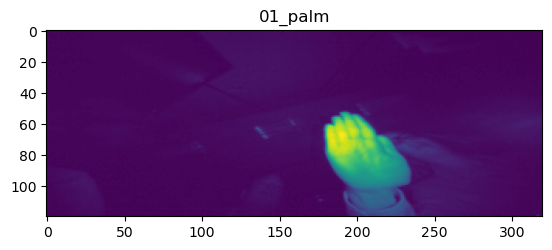

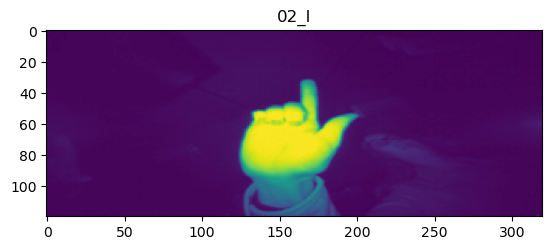

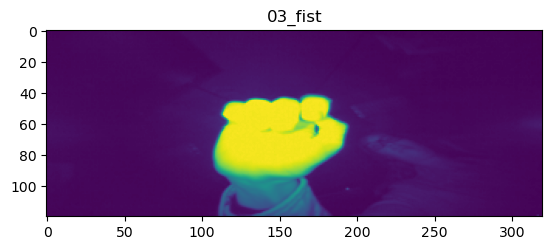

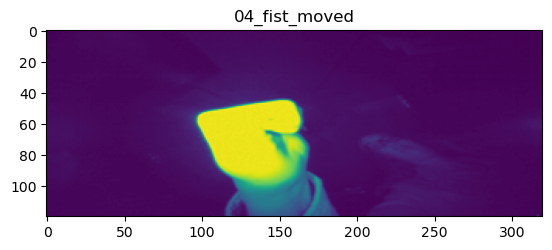

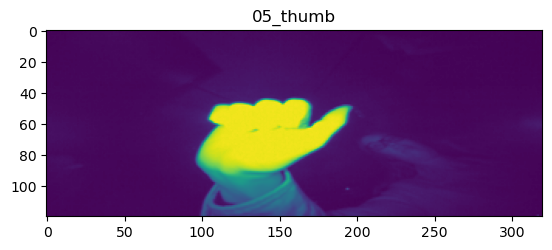

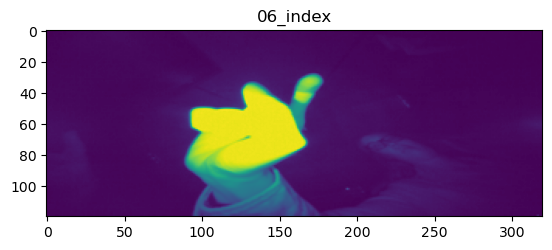

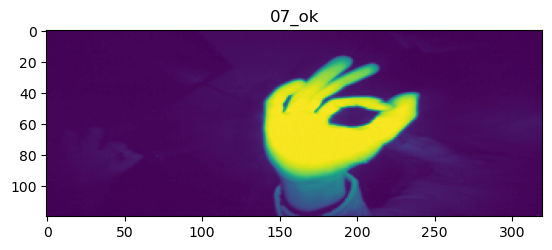

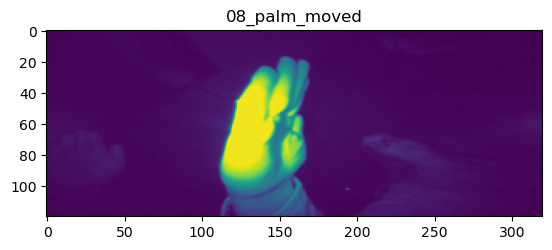

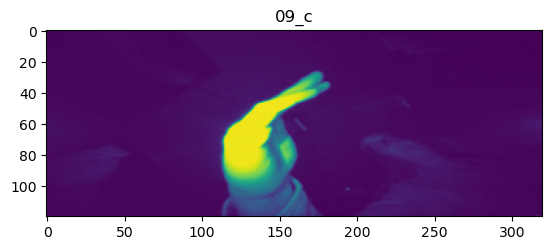

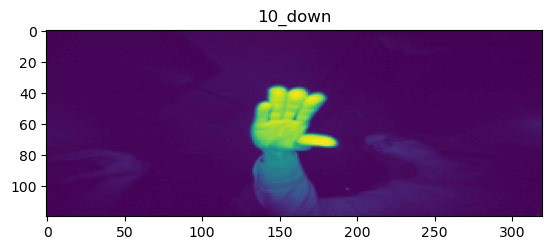

In [4]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [5]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [6]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [8]:
from keras import layers
from keras import models

In [9]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 [==============================] - 162s 630ms/step - loss: 0.3282 - accuracy: 0.8951 - val_loss: 0.0158 - val_accuracy: 0.9960
Epoch 2/10
250/250 [==============================] - 122s 490ms/step - loss: 0.0127 - accuracy: 0.9964 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 3/10
250/250 [==============================] - 137s 549ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 3.1805e-04 - val_accuracy: 1.0000
Epoch 4/10
250/250 [==============================] - 127s 507ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 9.3445e-04 - val_accuracy: 0.9995
Epoch 5/10
250/250 [==============================] - 118s 471ms/step - loss: 1.2170e-05 - accuracy: 1.0000 - val_loss: 2.3059e-04 - val_accuracy: 1.0000
Epoch 6/10
250/250 [==============================] - 171s 684ms/step - loss: 1.7384e-06 - accuracy: 1.0000 - val_loss: 2.4216e-04 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 115s 462ms/step - loss: 1.1379e-06 - accuracy:

In [11]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 4s 62ms/step - loss: 7.0031e-04 - accuracy: 0.9995
Accuracy:0.9994999766349792


In [12]:
model.save('model1.h5')

In [53]:
image = Image.open('siyona/palm.jpg')

image_gray = image.convert('L')

image_resized = image_gray.resize((320, 120))

image_array = np.array(image_resized)

image_array = image_array.reshape((1, 120, 320, 1))

image_array = image_array.astype('float32') / 255.0

In [54]:
predictions = model.predict(image_array)

predicted_index = np.argmax(predictions)

predicted_gesture = reverselookup[predicted_index]

print("Predicted Gesture:", predicted_gesture)

1/1 [==============================] - 0s 41ms/step
Predicted Gesture: 01_palm


In [56]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing import image

model = load_model('model1.h5')

gesture_dict = {
    0: 'palm', 1: 'l', 2: 'fist', 3: 'fist_moved', 4: 'thumb',
    5: 'index', 6: 'ok', 7: 'palm_moved', 8: 'c', 9: 'down'
}

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized_frame = cv2.resize(gray, (320, 120))
    reshaped_frame = resized_frame.reshape(1, 120, 320, 1) / 255.0

    prediction = model.predict(reshaped_frame)
    predicted_class = np.argmax(prediction, axis=1)
    gesture_name = gesture_dict[predicted_class[0]]

    cv2.putText(frame, gesture_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    cv2.imshow('Hand Gesture Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step
